In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Let's create classification dataset
from sklearn.datasets import make_circles

# Set 1000 samples
n_samples = 1000

# Features and labels
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [3]:
X, y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64))

In [4]:
# Let's visualise the above data using pandas DataFrame
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


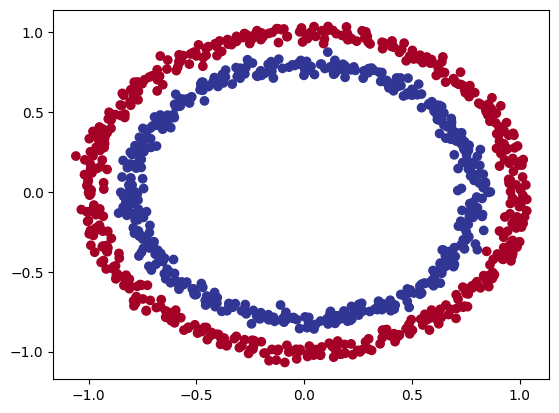

In [5]:
# Let's plot the above data 
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [6]:
# Let's build a model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model =  tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# 3. Fit the model
model.fit(X,y,epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 2.0451 - accuracy: 0.4710
Epoch 2/100
32/32 [==============================] - 0s 864us/step - loss: 0.8196 - accuracy: 0.4440
Epoch 3/100
32/32 [==============================] - 0s 864us/step - loss: 0.7733 - accuracy: 0.4410
Epoch 4/100
32/32 [==============================] - 0s 806us/step - loss: 0.7471 - accuracy: 0.4200
Epoch 5/100
32/32 [==============================] - 0s 785us/step - loss: 0.7291 - accuracy: 0.4410
Epoch 6/100
32/32 [==============================] - 0s 749us/step - loss: 0.7166 - accuracy: 0.4940
Epoch 7/100
32/32 [==============================] - 0s 733us/step - loss: 0.7079 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 756us/step - loss: 0.7032 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 822us/step - loss: 0.6994 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 682us/step - loss: 0.6971 - accuracy

In [7]:
# Lets Create a plotting function 
def plot_decision_boundary(model, X, y):
    
    """
    Plots the decision boundary created by a model predicting on X.
    """
    
    # Define the axis boundaries and create a meshgrid
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X values ( We are going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together
    
    # Make predictions using the trained model
    y_pred = model.predict(x_in)
    
    # Check for multiclass 
    if model.output_shape[-1] > 1:
        print("We are doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print(" we are doing binary classification...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
        
    # Plot the decision boundary 
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 749us/step
 we are doing binary classification...


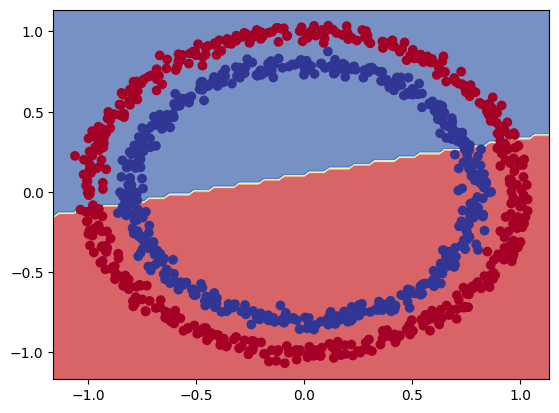

In [8]:
# Plot the decision boundary 
plot_decision_boundary(model, X, y)

In [9]:
# Let's build a model wherein the learning rate of Adam will be 0.001

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X,y,epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 2.6877 - accuracy: 0.4600
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7124 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.4930
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 722us/step - loss: 0.6952 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 719us/step - loss: 0.6961 - accuracy: 0.4490
Epoch 7/100
32/32 [==============================] - 0s 725us/step - loss: 0.6953 - accuracy: 0.5090
Epoch 8/100
32/32 [==============================] - 0s 684us/step - loss: 0.6953 - accuracy: 0.5160
Epoch 9/100
32/32 [==============================] - 0s 745us/step - loss: 0.6989 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 717us/step - loss: 0.6943 - accuracy: 0.47

In [10]:
# Evaluate the model
model_1.evaluate(X, y)

32/32 [==============================] - 0s 683us/step - loss: 0.6992 - accuracy: 0.5110


[0.6992232799530029, 0.5109999775886536]

313/313 [==============================] - 0s 556us/step
 we are doing binary classification...


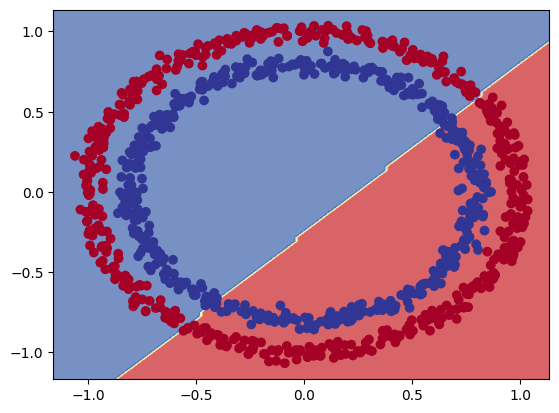

In [11]:
# Plot decision boundary
plot_decision_boundary(model_1, X, y)

In [12]:
# The missing piece is non linearity

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X,y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3006 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1439 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 836us/step - loss: 3.9542 - accuracy: 0.4410
Epoch 4/100
32/32 [==============================] - 0s 821us/step - loss: 3.6852 - accuracy: 0.4170
Epoch 5/100
32/32 [==============================] - 0s 710us/step - loss: 3.4982 - accuracy: 0.4140
Epoch 6/100
32/32 [==============================] - 0s 653us/step - loss: 3.3109 - accuracy: 0.4270
Epoch 7/100
32/32 [==============================] - 0s 742us/step - loss: 3.0247 - accuracy: 0.4400
Epoch 8/100
32/32 [==============================] - 0s 796us/step - loss: 2.4723 - accuracy: 0.4480
Epoch 9/100
32/32 [==============================] - 0s 710us/step - loss: 1.1530 - accuracy: 0.4590
Epoch 10/100
32/32 [==============================] - 0s 742us/step - loss: 0.8950 - accuracy: 

In [13]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.5000


[0.694756031036377, 0.5]

313/313 [==============================] - 0s 577us/step
 we are doing binary classification...


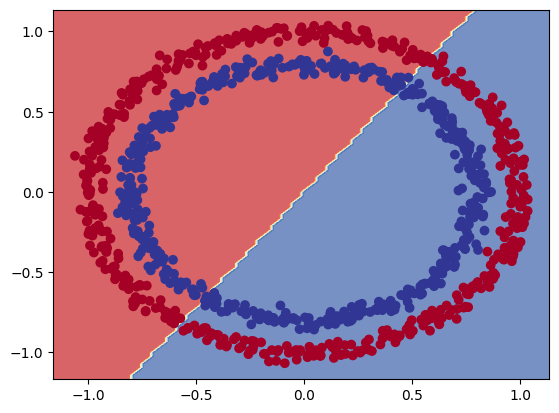

In [14]:
# Plot decision boundary
plot_decision_boundary(model_2, X, y)

In [22]:
# Again our model is trying to make a straight line

# Let's change the activation function to relu

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # Input layer
    tf.keras.layers.Dense(1) # Output layer
]) 

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 1.9120 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 954us/step - loss: 1.5029 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 953us/step - loss: 1.3904 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 823us/step - loss: 1.3125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 799us/step - loss: 1.2526 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 726us/step - loss: 1.2045 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 742us/step - loss: 1.1661 - accuracy: 0.4780
Epoch 8/100
32/32 [==============================] - 0s 774us/step - loss: 1.1342 - accuracy: 0.4340
Epoch 9/100
32/32 [==============================] - 0s 770us/step - loss: 1.1076 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 747us/step - loss: 1.0843 - accuracy

In [23]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 802us/step - loss: 0.6932 - accuracy: 0.5500


[0.6932010054588318, 0.550000011920929]

313/313 [==============================] - 0s 712us/step
 we are doing binary classification...


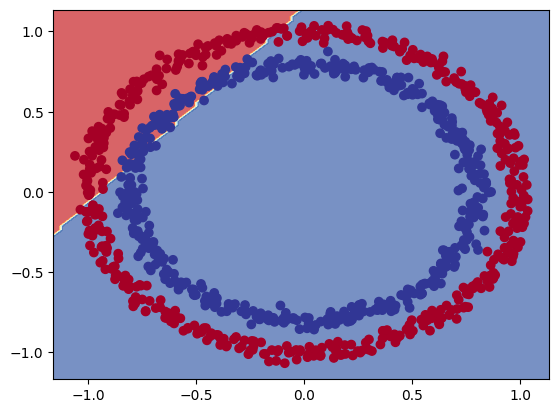

In [24]:
# Plot decision boundary
plot_decision_boundary(model_3, X, y)

In [25]:
# Let's try to build a model with 2 input layers with relu activation function

# Set random seed
tf.random.set_seed(42)

# 1. Create a model with Sequential API
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # Input layer 1
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # Input layer 2
    tf.keras.layers.Dense(1) # Output layer
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_4.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 1.9371 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 963us/step - loss: 1.4491 - accuracy: 0.4690
Epoch 3/100
32/32 [==============================] - 0s 998us/step - loss: 1.3429 - accuracy: 0.4150
Epoch 4/100
32/32 [==============================] - 0s 734us/step - loss: 1.2759 - accuracy: 0.4210
Epoch 5/100
32/32 [==============================] - 0s 771us/step - loss: 1.2259 - accuracy: 0.4430
Epoch 6/100
32/32 [==============================] - 0s 742us/step - loss: 1.1861 - accuracy: 0.4470
Epoch 7/100
32/32 [==============================] - 0s 783us/step - loss: 1.1528 - accuracy: 0.4520
Epoch 8/100
32/32 [==============================] - 0s 711us/step - loss: 1.1249 - accuracy: 0.4510
Epoch 9/100
32/32 [==============================] - 0s 742us/step - loss: 1.0989 - accuracy: 0.4550
Epoch 10/100
32/32 [==============================] - 0s 741us/step - loss: 1.0748 - accuracy

In [26]:
# Evaluate the model
model_4.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.5083 - accuracy: 0.8450


[0.5082813501358032, 0.8450000286102295]

313/313 [==============================] - 0s 527us/step
 we are doing binary classification...


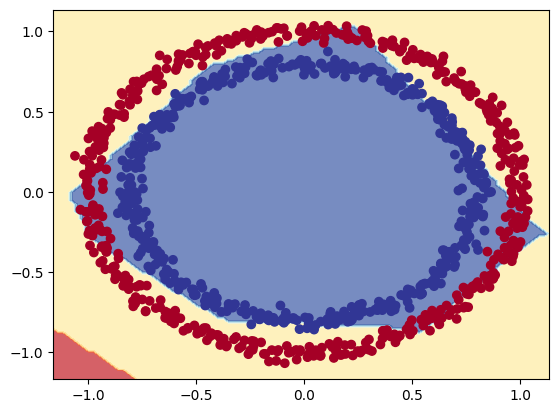

In [27]:
# Plot decision boundary
plot_decision_boundary(model_4, X, y)

In [28]:
# Let's try to introduce sigmoid activation function in output layer

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # Input layer 1
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # Input layer 2
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # Output layer
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_5.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5040
Epoch 2/100
32/32 [==============================] - 0s 893us/step - loss: 0.6902 - accuracy: 0.5070
Epoch 3/100
32/32 [==============================] - 0s 866us/step - loss: 0.6898 - accuracy: 0.5070
Epoch 4/100
32/32 [==============================] - 0s 825us/step - loss: 0.6895 - accuracy: 0.5090
Epoch 5/100
32/32 [==============================] - 0s 678us/step - loss: 0.6892 - accuracy: 0.5100
Epoch 6/100
32/32 [==============================] - 0s 656us/step - loss: 0.6889 - accuracy: 0.5110
Epoch 7/100
32/32 [==============================] - 0s 645us/step - loss: 0.6883 - accuracy: 0.5220
Epoch 8/100
32/32 [==============================] - 0s 710us/step - loss: 0.6880 - accuracy: 0.5210
Epoch 9/100
32/32 [==============================] - 0s 871us/step - loss: 0.6875 - accuracy: 0.5220
Epoch 10/100
32/32 [==============================] - 0s 871us/step - loss: 0.6870 - accuracy

In [29]:
# Evaluate the model
model_5.evaluate(X, y)

32/32 [==============================] - 0s 999us/step - loss: 0.4442 - accuracy: 0.8380


[0.4442187249660492, 0.8379999995231628]

313/313 [==============================] - 0s 580us/step
 we are doing binary classification...


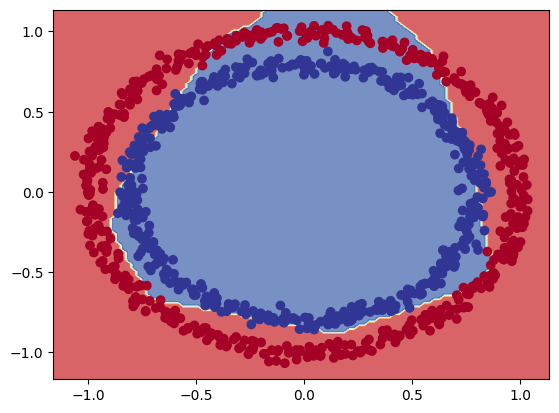

In [30]:
# Plot decision boundary
plot_decision_boundary(model_5, X, y)